#### Load libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import dataset
df = pd.read_csv('Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
df.isna().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [4]:
df.shape

(10, 3)

In [13]:
# Create dep and indep vars
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [14]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [15]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [16]:
# reshape y into a column vector
y = y.reshape(len(y), 1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [17]:
# feauture scaling
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y= sc_y.fit_transform(y)

In [18]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [19]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [20]:
# train svr model on the entire data
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

C:\Users\Beam\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [21]:
# Predict a new result

sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1, 1))

array([[170370.0204065]])

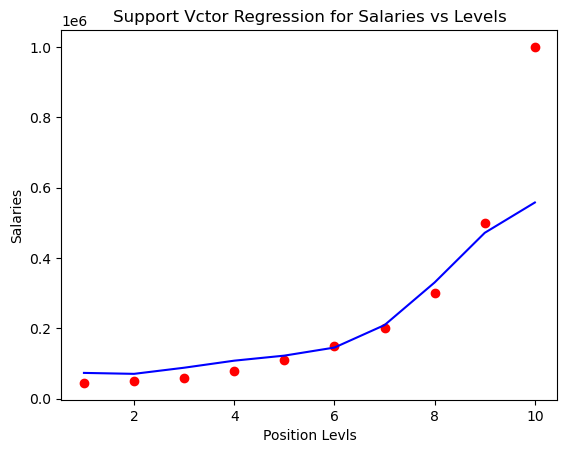

In [26]:
# visualize the svr results
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)), color='blue')
plt.title('Support Vctor Regression for Salaries vs Levels')
plt.xlabel('Position Levls')
plt.ylabel('Salaries')
plt.show()

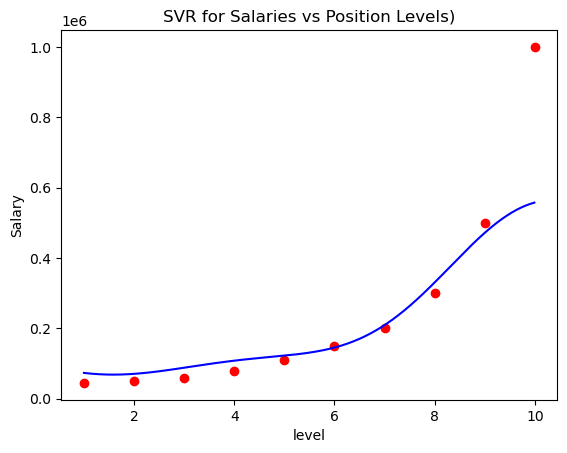

In [32]:
# visualize the svr results  for higher resolutions and smoother curves
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('SVR for Salaries vs Position Levels)')
plt.xlabel('level')
plt.ylabel('Salary')
plt.show()